In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel("microbes.xlsx")
display(df)

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Toxin Production,Toxin Type,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne
0,Moraxellaceae,Acinetobacter,baumannii,Negative,1-2,Rod,Aerobe,6-8,30-37,Moderate,...,No,None,No,Yes,No,No,No,No,Moderate,No
1,Actinobacteria,Actinobacteria,thermophila,Positive,2-4,Rod,Aerobe,6-8,45-60,Moderate,...,No,None,No,No,No,Yes,No,No,Low,No
2,Actinomycetaceae,Actinopolyspora,propionica,Positive,2-4,Rod,Aerobe,6-8,25-37,High,...,No,None,No,No,Yes,Yes,No,No,Low,No
3,Alcaligenaceae,Alcaligenes,faecalis,Negative,1-2,Rod,Aerobe,6-8,30-37,Moderate,...,No,None,No,Yes,No,No,Yes,No,Low,No
4,Bacillaceae,Bacillus,anthracis,Positive,2-4,Rod,Aerobe,6-8,30-37,Low,...,Yes,Exotoxin,Yes,Yes,Yes,Yes,No,No,High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Spirochaetaceae,Treponema,pallidum,Negative,6-15,Spiral,Microaerophilic,7-8,30-37,Low,...,No,None,No,Yes,No,No,Yes,No,High,No
70,Vibrionaceae,Vibrio,cholerae,Negative,2-4,Rod,Facultative Anaerobe,6-9,20-37,High,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,High,Yes
71,Vibrionaceae,Vibrio,parahaemolyticus,Negative,2-4,Rod,Facultative Anaerobe,6-9,20-37,High,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,Moderate,Yes
72,Vibrionaceae,Vibrio,vulnificus,Negative,2-4,Rod,Facultative Anaerobe,6-9,20-37,High,...,Yes,Exotoxin,No,Yes,No,No,Yes,No,High,Yes


In [13]:
# display(df.dtypes)

In [14]:
gram_stain = df.groupby("Gram Stain").size()
display(gram_stain)

Gram Stain
Negative    38
Positive    36
dtype: int64

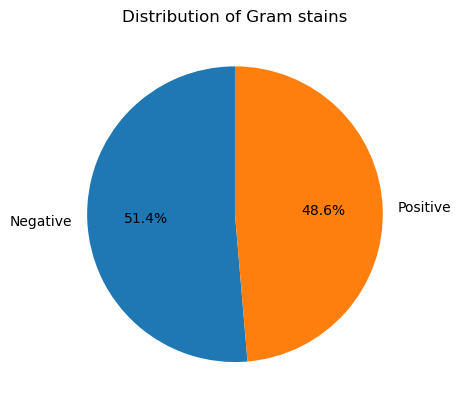

In [15]:
plt.pie(gram_stain, labels=gram_stain.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Gram stains")
plt.show()

In [16]:
genus_all = df.groupby("Genus").size()
multiple_genera = genus_all[genus_all > 1].sort_values()

print(f"There are {len(multiple_genera)} genera occuring more than once\n")
print(multiple_genera)

There are 11 genera occuring more than once

Genus
Enterobacter       2
Neisseria          2
Salmonella         2
Clostridium        3
Corynebacterium    3
Lactobacillus      3
Staphylococcus     3
Vibrio             3
Pseudomonas        4
Streptococcus      5
Bacillus           9
dtype: int64


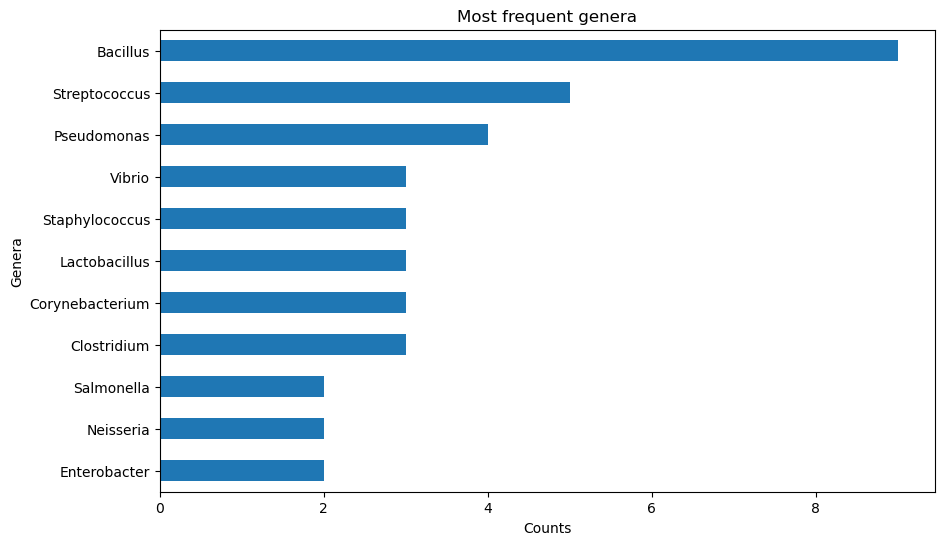

In [17]:
multiple_genera.plot(
    kind="barh",
    figsize=(10, 6),
)
plt.title("Most frequent genera")
plt.xlabel("Counts")
plt.ylabel("Genera")
plt.show()

In [18]:
# Split pH values into 2 columns, and convert to number

df[["pH Lower", "pH Upper"]] = df["pH Range"].str.split("-", expand=True)

df["pH Lower"] = pd.to_numeric(df["pH Lower"])
df["pH Upper"] = pd.to_numeric(df["pH Upper"])

In [19]:
acid_tolerant = df[df["pH Lower"] < 6]

display(acid_tolerant)

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper
14,Chromobacteriaceae,Chromobacterium,violaceum,Negative,1-3,Rod,Facultative Anaerobe,5-9,20-37,Low,...,No,Yes,Yes,Yes,Yes,Purple-Violet (Violacein),Moderate,No,5,9
15,Clostridiaceae,Clostridium,botulinum,Positive,4-6,Rod,Anaerobe,4-7,20-37,Low,...,Yes,Yes,No,Yes,No,No,High,Yes,4,7
29,Lactobacillaceae,Lactobacillus,acidophilus,Positive,1-2,Rod,Facultative Anaerobe,4-7,30-37,Low,...,No,No,No,Yes,No,No,Low,Yes,4,7
30,Lactobacillaceae,Lactobacillus,plantarum,Positive,1-2,Rod,Facultative Anaerobe,4-7,20-37,Low,...,No,No,No,Yes,No,No,Low,Yes,4,7
31,Lactobacillaceae,Lactobacillus,reuteri,Positive,1-2,Rod,Facultative Anaerobe,4-7,20-37,Low,...,No,No,No,Yes,No,No,Low,Yes,4,7
33,Listeriaceae,Listeria,monocytogenes,Positive,1-2,Rod,Facultative Anaerobe,4-9,1-45,Moderate,...,No,Yes,No,Yes,Yes,No,Moderate,Yes,4,9
44,Propionibacteriaceae,Propionibacterium,acnes,Positive,1-2,Rod,Anaerobe,4-7,30-37,Low,...,No,Yes,No,No,No,No,Low,No,4,7
55,Serratiaceae,Serratia,marcescens,Negative,1-2,Rod,Facultative Anaerobe,5-9,20-37,Low,...,No,Yes,No,Yes,Yes,Red (Prodigiosin),Moderate,Yes,5,9
59,Staphylococcaceae,Staphylococcus,aureus,Positive,1-2,Sphere,Facultative Anaerobe,4-9,15-45,Moderate,...,No,Yes,No,Yes,No,Golden Pigment,Moderate,Yes,4,9


In [20]:
base_tolerant = df[df["pH Upper"] > 8]

display(base_tolerant)

,Family,Genus,Species,Gram Stain,Size,Shape,Metabolism,pH Range,Temp. Range,Salt Tolerance,...,Spore Formation,Pathogen,Antibiotic Produced,Industrial Use,Motile,Color or Pigment Production,Mortality Rate,Foodborne,pH Lower,pH Upper
7,Bacillaceae,Bacillus,halodurans,Positive,2-5,Rod,Aerobe,6-10,20-50,High,...,Yes,No,Yes,Yes,Yes,No,Low,No,6,10
14,Chromobacteriaceae,Chromobacterium,violaceum,Negative,1-3,Rod,Facultative Anaerobe,5-9,20-37,Low,...,No,Yes,Yes,Yes,Yes,Purple-Violet (Violacein),Moderate,No,5,9
25,Halobacteriaceae,Halobacterium,salinarum,Negative,1-2,Rod,Aerobe,6-9,35-50,High,...,No,No,No,Yes,Yes,Red (Bacterioruberin),Low,No,6,9
26,Halomonadaceae,Halomonas,elongata,Negative,1-2,Rod,Facultative Anaerobe,6-9,20-40,High,...,No,No,No,Yes,Yes,No,Low,No,6,9
33,Listeriaceae,Listeria,monocytogenes,Positive,1-2,Rod,Facultative Anaerobe,4-9,1-45,Moderate,...,No,Yes,No,Yes,Yes,No,Moderate,Yes,4,9
41,Nostocaceae,Nostoc,commune,Negative,5-15,Rod,Photosynthetic,6-9,20-30,Moderate,...,No,No,No,Yes,Yes,No,Low,No,6,9
42,Cyanobacteriaceae,Oscillatoria,princeps,Negative,7-12,Rod,Photosynthetic,6-9,20-30,Moderate,...,No,No,No,Yes,Yes,No,Low,No,6,9
52,Salinibacteraceae,Salinibacter,ruber,Negative,1-3,Rod,Aerobe,6-9,35-50,High,...,No,No,No,Yes,Yes,Red (Carotenoid Pigments),Low,No,6,9
55,Serratiaceae,Serratia,marcescens,Negative,1-2,Rod,Facultative Anaerobe,5-9,20-37,Low,...,No,Yes,No,Yes,Yes,Red (Prodigiosin),Moderate,Yes,5,9
59,Staphylococcaceae,Staphylococcus,aureus,Positive,1-2,Sphere,Facultative Anaerobe,4-9,15-45,Moderate,...,No,Yes,No,Yes,No,Golden Pigment,Moderate,Yes,4,9
